In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl
import pypsr as pyps
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Equation of the lorenz system 

def lorenz(Var, t, sigma, b, r):
    x, y, z = Var
    x_dot = sigma*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [3]:
# Parameters
sigma, b, r = 10, 2.667, 28
#initial conditions 
Var0= [-0.75,0.25,0.1]
# time steps
t = np.linspace(0, 100, 100000)
sol = solve_ivp(lambda t, Var: lorenz(Var,t,sigma,b,r),[t[0],t[-1]],Var0,method='RK45',t_eval=t)

In [4]:
# Calculate distance matrix

from sklearn.metrics.pairwise import euclidean_distances
dist_mat=euclidean_distances(sol.y[0:3,500:45000:20].T, sol.y[0:3,500:45000:20].T)
bin_mat=np.zeros_like(dist_mat)
n1=bin_mat.shape[0]
di = np.diag_indices(n1)

In [5]:
# Calculate correlation sum for different thresholds 

eps_l=[];C_eps_l=[]
for eps_0 in np.geomspace(0.001, 40.0, num=70):
    bin_mat[dist_mat<eps_0]=1.0
    bin_mat[di]=0.0
    C_eps=np.sum(bin_mat)/np.float(n1**2)
    eps_l.append(eps_0);C_eps_l.append(C_eps)
    bin_mat=np.zeros_like(dist_mat)
eps_l=np.array(eps_l); C_eps_l=np.array(C_eps_l)

In [6]:
# Fit the power law and plot it
eps_l_log = np.log(eps_l)
C_eps_l_log = np.log(C_eps_l)

In [7]:
#find scaling region 
b_eps_l=eps_l[(C_eps_l<0.065) & (C_eps_l>0.00005)]
b_C_eps_l=C_eps_l[(C_eps_l<0.065) & (C_eps_l>0.00005)]

In [8]:
coeffs = np.polyfit(np.log(b_eps_l),np.log(b_C_eps_l),deg=1)
poly = np.poly1d(coeffs)
yfit = np.exp(poly(np.log(b_eps_l)))

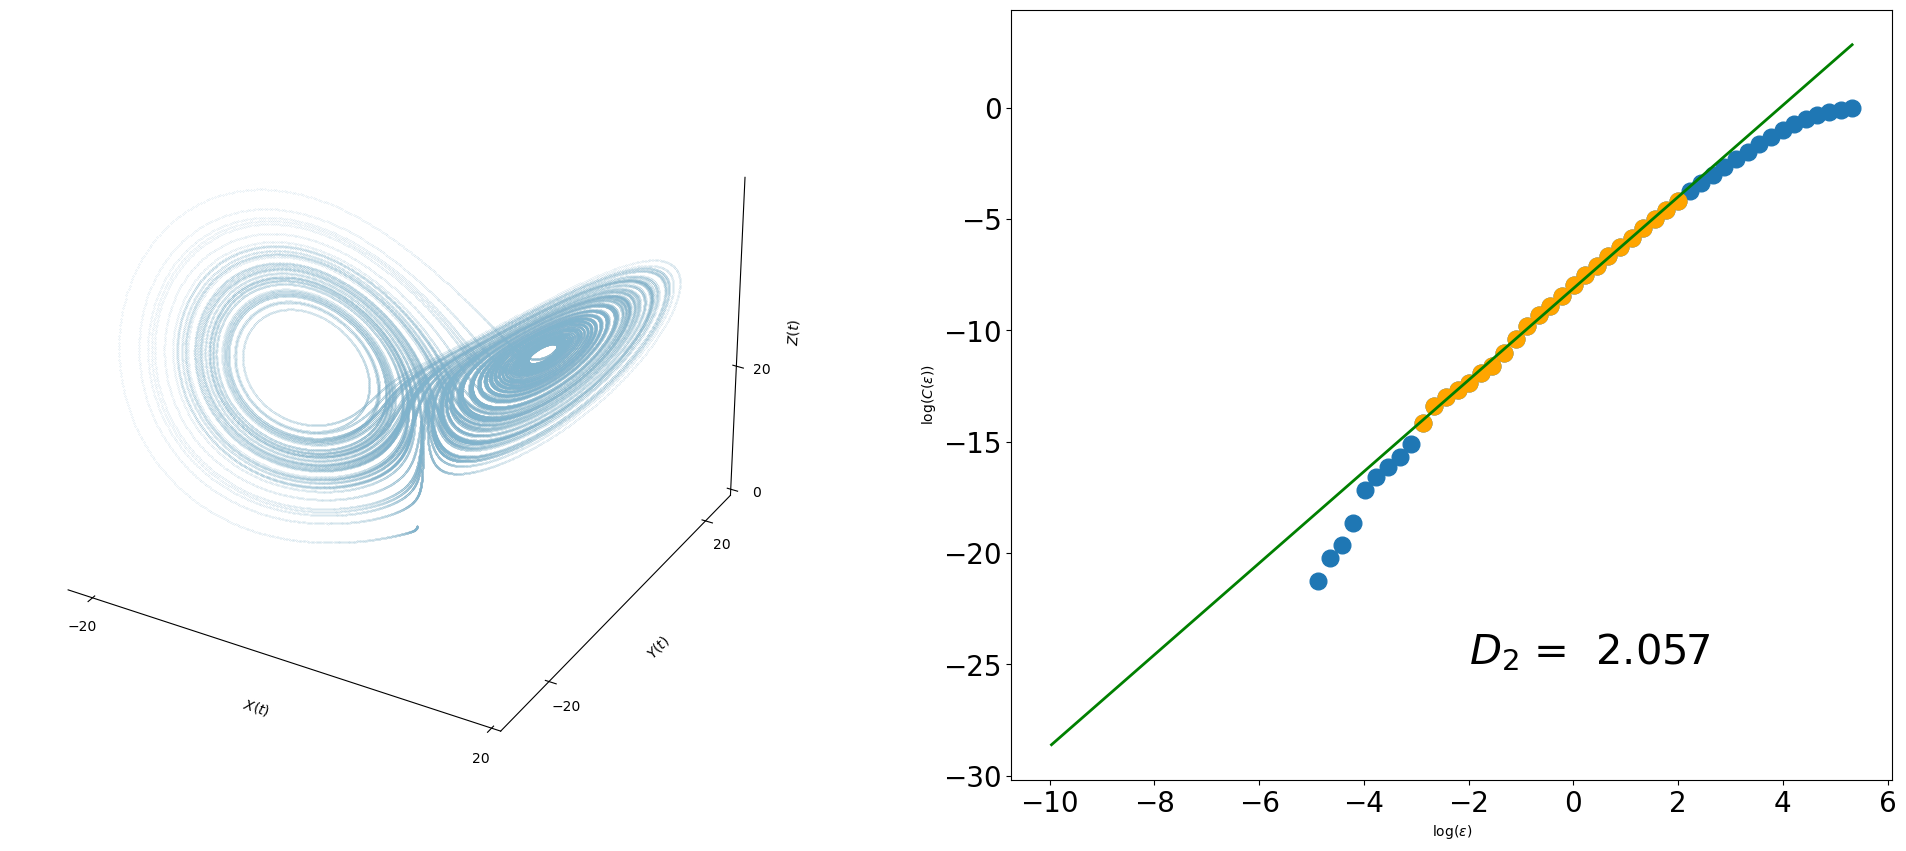

In [9]:
from mpl_toolkits.mplot3d import axes3d    

fig = plt.figure(figsize=(25, 10))



ax = fig.add_subplot(1, 2, 1, projection='3d')

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['text.usetex']= 'False'

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20



ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.set_xlabel(r'${X(t)}$')
ax.set_ylabel(r'${Y(t)}$')
ax.set_zlabel(r'${Z(t)}$')


ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],marker='o', color=[0.5,0.7,0.8],linestyle ='None',ms=0.1)


ax.set_xticks([-20,20])
ax.set_yticks([-20,20])
ax.set_zticks([0,20])

#ax.view_init(10, 250)
ax.grid(False)



ax1 = fig.add_subplot(1, 2, 2)
ax1.plot( np.log2(eps_l), np.log2(C_eps_l),'o',ms=12)
ax1.plot(np.log2(b_eps_l),np.log2(b_C_eps_l),'o',ms=12,color='orange')
yfit = np.exp(poly(np.log(eps_l)))
ax1.plot( np.log2(eps_l), np.log2(yfit),lw=2,color='green')
ax1.set_xlabel(r'$\log(\epsilon)$')
ax1.set_ylabel(r'$\log(C(\epsilon))$')
ax1.text(-2,-25,r'$D_2$ =  %3.3f' % (coeffs[0]),fontsize=30);

In [10]:
# Next let's generate the plot of reconstructed phase space 
Recons=pyps.reconstruct(sol.y[0,:],152,3)
#Recons.shape


# Calculate distance matrix

from sklearn.metrics.pairwise import euclidean_distances
dist_mat=euclidean_distances(Recons[500:55000:25,:],Recons[500:55000:25,:])
bin_mat=np.zeros_like(dist_mat)
n1=bin_mat.shape[0]
di = np.diag_indices(n1)




# Calculate correlation sum for different thresholds 

eps_l=[];C_eps_l=[]
for eps_0 in np.geomspace(0.001, 40.0, num=70):
    bin_mat[dist_mat<eps_0]=1.0
    bin_mat[di]=0.0
    C_eps=np.sum(bin_mat)/np.float(n1**2)
    eps_l.append(eps_0);C_eps_l.append(C_eps)
    bin_mat=np.zeros_like(dist_mat)
eps_l=np.array(eps_l); C_eps_l=np.array(C_eps_l)


# Fit the power law and plot it
eps_l_log = np.log(eps_l)
C_eps_l_log = np.log(C_eps_l)

#find scaling region 
b_eps_l=eps_l[(C_eps_l<0.065) & (C_eps_l>0.00005)]
b_C_eps_l=C_eps_l[(C_eps_l<0.065) & (C_eps_l>0.00005)]

coeffs = np.polyfit(np.log(b_eps_l),np.log(b_C_eps_l),deg=1)
poly = np.poly1d(coeffs)
yfit = np.exp(poly(np.log(b_eps_l)))

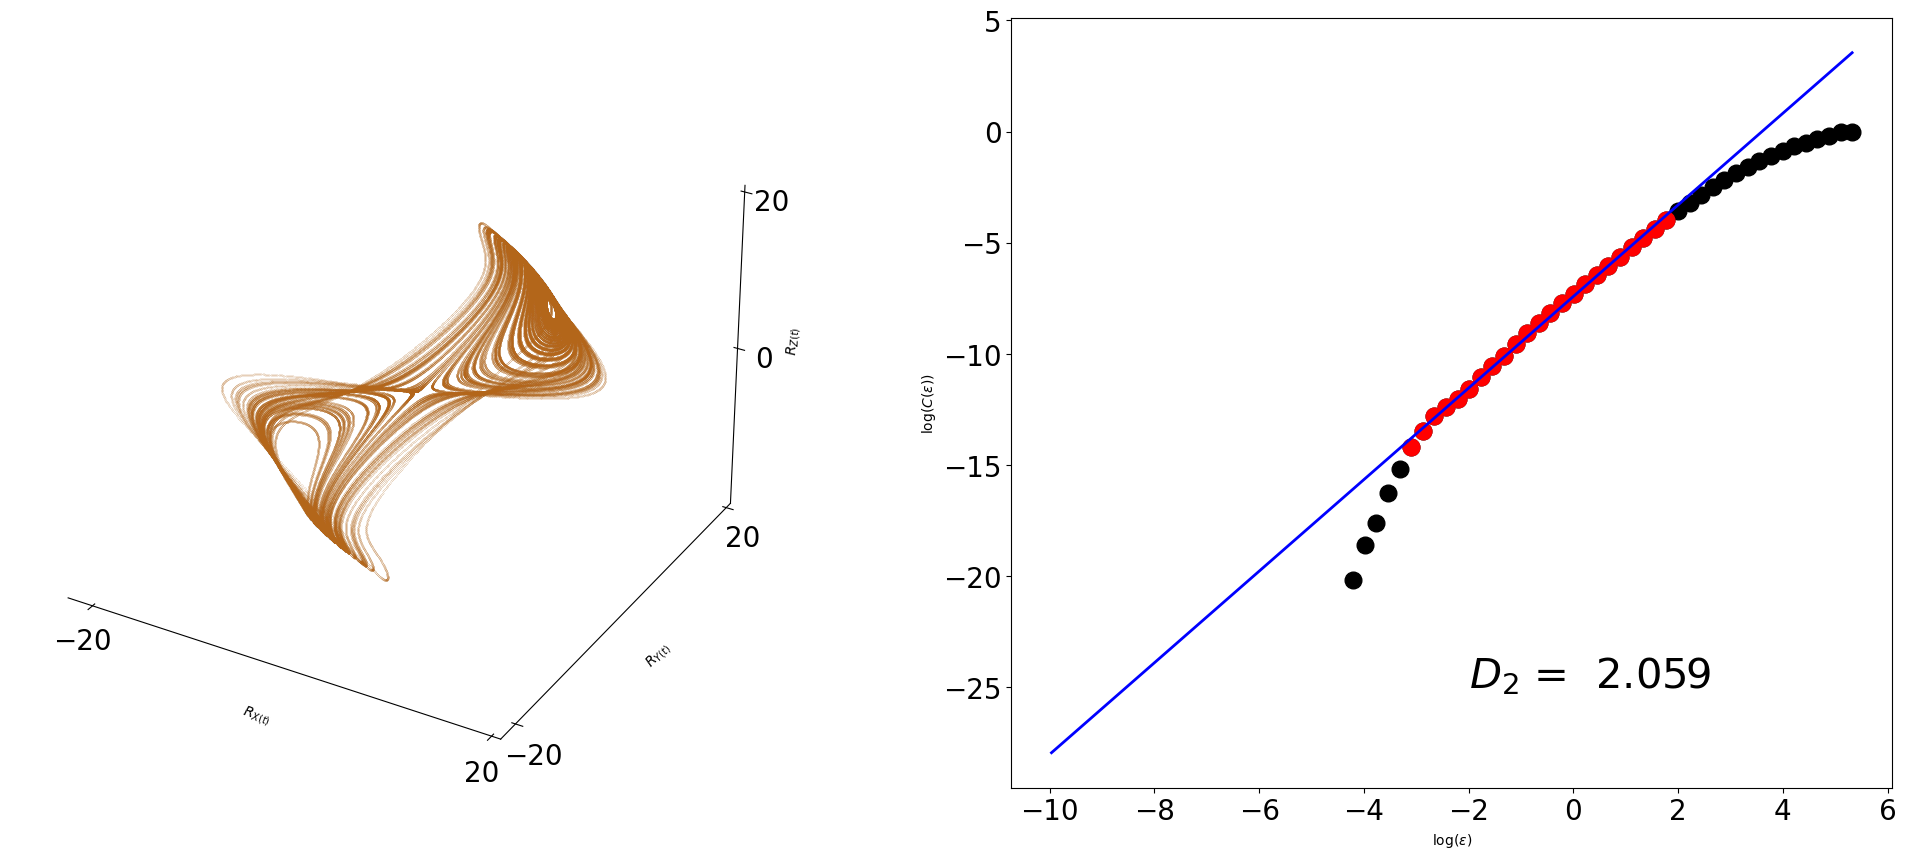

In [11]:
from mpl_toolkits.mplot3d import axes3d    

fig = plt.figure(figsize=(25, 10))



ax = fig.add_subplot(1, 2, 1, projection='3d')

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['text.usetex']= 'False'

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20



ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.set_xlabel(r'$R_{X(t)}$')
ax.set_ylabel(r'$R_{Y(t)}$')
ax.set_zlabel(r'$R_{Z(t)}$')

#ax.plot(Recons[:,2],Recons[:,0],Recons[:,1],linewidth=2, color=[0.3,0.5,0.7],linestyle ='None',ms=4)
ax.plot(Recons[:,2],Recons[:,0],Recons[:,1],marker='o', color=[0.7,0.4,0.1],linestyle ='None',ms=0.1)


ax.set_xticks([-20,20])
ax.set_yticks([-20,20])
ax.set_zticks([0,20])

#ax.view_init(10, 250)
ax.grid(False)



ax1 = fig.add_subplot(1, 2, 2)
ax1.plot( np.log2(eps_l), np.log2(C_eps_l),'o',ms=12,color='black')
ax1.plot(np.log2(b_eps_l),np.log2(b_C_eps_l),'o',ms=12,color='red')
yfit = np.exp(poly(np.log(eps_l)))
ax1.plot( np.log2(eps_l), np.log2(yfit),lw=2,color='blue')
ax1.set_xlabel(r'$\log(\epsilon)$')
ax1.set_ylabel(r'$\log(C(\epsilon))$')
ax1.text(-2,-25,r'$D_2$ =  %3.3f' % (coeffs[0]),fontsize=30);